In [1]:
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.engine import training
from keras.losses import categorical_crossentropy
from keras.models import Model
from keras import Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from typing import Tuple, List
import glob
import numpy as np
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Average
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.nasnet import NASNetLarge
from keras.applications.efficientnet_v2 import EfficientNetV2L
from keras.applications.densenet import DenseNet201
from keras.applications.xception import Xception, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

import inspect
from tqdm import tqdm
import matplotlib.pyplot as plt
from numpy import save


from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from scipy import stats
from statistics import mean
from keras.models import load_model

In [2]:

BATCH_SIZE = 64

train_generator = ImageDataGenerator(rescale=1./255) 

val_generator = ImageDataGenerator(rescale=1./255)

test_generator = ImageDataGenerator(rescale=1./255)


In [3]:
train_data_dir = './data_splits/train'
val_data_dir = './data_splits/val'
test_data_dir = './data_splits/test'




traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=BATCH_SIZE,
                                               subset='training',
                                               seed=30)

validgen = val_generator.flow_from_directory(val_data_dir,
                                             target_size=(224, 224),
                                             batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               seed=52)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             batch_size=BATCH_SIZE,
                                             
                                             shuffle=False,
                                             seed=52)

Found 151 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [4]:
input_shape = (224, 224, 3)
optimizer = Adam(learning_rate=0.001)
n_classes= len(traingen.class_indices)

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 100
model_input = Input(shape=input_shape)

# Shallow

In [5]:
def vgg16_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG16(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg16_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg19_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG19(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg19_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model




def mobilenet_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = MobileNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='mobilenet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def inceptionresnet_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = InceptionResNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='inceptionresnet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model





def xception_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = Xception(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='xception_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def resnet50_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = ResNet50(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='resnet50_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def nasnetlarge_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = NASNetLarge(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='nasnetlarge_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def efficientnet_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = EfficientNetV2L(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='efficientnet_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
   
   
    return model

def densenet_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = DenseNet201(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='densenet_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

# Medium

In [6]:

def mobilenet_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = MobileNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='mobilenet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def xception_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = Xception(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='xception_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg19_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG19(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg19_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg16_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG16(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg16_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model



def inceptionresnet_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = InceptionResNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='inceptionresnet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model


def resnet50_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = ResNet50(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='resnet50_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def nasnetlarge_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = NASNetLarge(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='nasnetlarge_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def efficientnet_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = EfficientNetV2L(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='efficientnet_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def densenet_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = DenseNet201(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='densenet_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model


# DNN

In [7]:
def xception_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = Xception(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='xception_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg19_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG19(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg19_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg16_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG16(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg16_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model



def mobilenet_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = MobileNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='mobilenet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model


def inceptionresnet_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = InceptionResNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='inceptionresnet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model


def nasnetlarge_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = NASNetLarge(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='nasnetlarge_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def resnet50_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = ResNet50(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='resnet50_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def efficientnet_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = EfficientNetV2L(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='efficientnet_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model


def densenet_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = DenseNet201(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='densenet_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model



In [8]:
vgg16_model_shallow = vgg16_shallow(model_input, optimizer)
vgg16_model_shallow.load_weights('tl_model_nonprocessed_vgg16_shallow.weights.best.hdf5')

vgg19_model_shallow = vgg19_shallow(model_input, optimizer)
vgg19_model_shallow.load_weights('tl_model_nonprocessed_vgg19_shallow.weights.best.hdf5')


mobilenet_model_shallow = mobilenet_shallow(model_input, optimizer)
mobilenet_model_shallow.load_weights('tl_model_nonprocessed_mobilenet_shallow.weights.best.hdf5')

xception_model_shallow = xception_shallow(model_input, optimizer)
xception_model_shallow.load_weights('tl_model_nonprocessed_xception_shallow.weights.best.hdf5')

efficientnet_model_shallow = efficientnet_shallow(model_input, optimizer)
efficientnet_model_shallow.load_weights('tl_model_nonprocessed_efficientnet_shallow.weights.best.hdf5')

resnet_model_shallow = resnet50_shallow(model_input, optimizer)
resnet_model_shallow.load_weights('tl_model_nonprocessed_resnet50_shallow.weights.best.hdf5')

densenet_model_shallow = densenet_shallow(model_input, optimizer)
densenet_model_shallow.load_weights('tl_model_nonprocessed_densenet_shallow.weights.best.hdf5')

nasnetlarge_model_shallow = nasnetlarge_shallow(model_input, optimizer)
nasnetlarge_model_shallow.load_weights('tl_model_nonprocessed_nasnetlarge_shallow.weights.best.hdf5')

inceptionresnet_model_shallow = inceptionresnet_shallow(model_input, optimizer)
inceptionresnet_model_shallow.load_weights('tl_model_nonprocessed_inceptionresnet_shallow.weights.best.hdf5')

####################################### medium ############################################

vgg16_model_medium = vgg16_medium(model_input, optimizer)
vgg16_model_medium.load_weights('tl_model_nonprocessed_vgg16_medium.weights.best.hdf5')

vgg19_model_medium = vgg19_medium(model_input, optimizer)
vgg19_model_medium.load_weights('tl_model_nonprocessed_vgg19_medium.weights.best.hdf5')



mobilenet_model_medium = mobilenet_medium(model_input, optimizer)
mobilenet_model_medium.load_weights('tl_model_nonprocessed_mobilenet_medium.weights.best.hdf5')

xception_model_medium = xception_medium(model_input, optimizer)
xception_model_medium.load_weights('tl_model_nonprocessed_xception_medium.weights.best.hdf5')

efficientnet_model_medium = efficientnet_medium(model_input, optimizer)
efficientnet_model_medium.load_weights('tl_model_nonprocessed_efficientnet_medium.weights.best.hdf5')

resnet_model_medium = resnet50_medium(model_input, optimizer)
resnet_model_medium.load_weights('tl_model_nonprocessed_resnet50_medium.weights.best.hdf5')

densenet_model_medium = densenet_medium(model_input, optimizer)
densenet_model_medium.load_weights('tl_model_nonprocessed_densenet_medium.weights.best.hdf5')

nasnetlarge_model_medium = nasnetlarge_medium(model_input, optimizer)
nasnetlarge_model_medium.load_weights('tl_model_nonprocessed_nasnetlarge_medium.weights.best.hdf5')

inceptionresnet_model_medium = inceptionresnet_medium(model_input, optimizer)
inceptionresnet_model_medium.load_weights('tl_model_nonprocessed_inceptionresnet_medium.weights.best.hdf5')


################################## dnn ############################
vgg16_model_dnn = vgg16_dnn(model_input, optimizer)
vgg16_model_dnn.load_weights('tl_model_nonprocessed_vgg16_dnn.weights.best.hdf5')

vgg19_model_dnn = vgg19_dnn(model_input, optimizer)
vgg19_model_dnn.load_weights('tl_model_nonprocessed_vgg19_dnn.weights.best.hdf5')


mobilenet_model_dnn = mobilenet_dnn(model_input, optimizer)
mobilenet_model_dnn.load_weights('tl_model_nonprocessed_mobilenet_dnn.weights.best.hdf5')


xception_model_dnn = xception_dnn(model_input, optimizer)
xception_model_dnn.load_weights('tl_model_nonprocessed_xception_dnn.weights.best.hdf5')

efficientnet_model_dnn = efficientnet_dnn(model_input, optimizer)
efficientnet_model_dnn.load_weights('tl_model_nonprocessed_efficientnet_dnn.weights.best.hdf5')

resnet_model_dnn = resnet50_dnn(model_input, optimizer)
resnet_model_dnn.load_weights('tl_model_nonprocessed_resnet50_dnn.weights.best.hdf5')

densenet_model_dnn = densenet_dnn(model_input, optimizer)
densenet_model_dnn.load_weights('tl_model_nonprocessed_densenet_dnn.weights.best.hdf5')

nasnetlarge_model_dnn = nasnetlarge_dnn(model_input, optimizer)
nasnetlarge_model_dnn.load_weights('tl_model_nonprocessed_nasnetlarge_dnn.weights.best.hdf5')

inceptionresnet_model_dnn = inceptionresnet_dnn(model_input, optimizer)
inceptionresnet_model_dnn.load_weights('tl_model_nonprocessed_inceptionresnet_dnn.weights.best.hdf5')


In [9]:
class GeneticAlgorithm:
    def __init__(self, 
                 n_genes,
                 n_iterations,
                 lchrom, 
                 pcross, 
                 pmutation, 
                 crossover_type, 
                 mutation_type, 
                 selection_type, 
                 cut_point,
                 popsize, 
                 n_elites,
                 models,
                 n_classes,
                 traingen,
                 validgen,
                 n_steps,
                 n_val_steps,
                 n_epochs,
                 random_state = 123):
        

        self.n_genes = n_genes
        self.lchrom = lchrom
        self.popsize = popsize
        self.pcross = pcross
        self.pmutation = pmutation
        self.crossover_type = crossover_type
        self.mutation_type = mutation_type
        self.selection_type = selection_type
        self.random_state = random_state
        self.n_iterations = n_iterations
        self.n_elites = n_elites
        self.best_fitness_evolution = []
        self.cut_point = cut_point
        self.models = models
        self.n_classes = n_classes
        self.traingen = traingen
        self.validgen = validgen
        self.batch_size = 32
        self.input_shape = (32, 32, 3)
        self.n_steps = n_steps
        self.n_val_steps = n_val_steps
        self.n_epochs = n_epochs
    
        pop = []
        while (len(pop) < self.popsize):
            chromosome = np.random.randint(2, size= self.n_genes)
            if (sum(chromosome[:self.cut_point]) > 0 and sum(chromosome[self.cut_point:]) == 1 ):
                pop.append(chromosome)

            
        # Convert pop to list of solutions
        self.population = [tuple(x) for x in pop]

        
        
        
    def fitness_func(self, solution, cut_point):
        
        models = []
        
        input_shape = (224, 224, 3)
        model_input = Input(shape=input_shape)
        
        # first, define the three meta learners
        
        for i in range(cut_point, len(solution)):
            if (solution[i]):
           
                if i == 7:
                    # 1. shallow fully connected layers
                    for j in range(cut_point):
                        if (solution[j]):
                            if j == 0:
                                models.append(vgg16_model_shallow)
                           
                           
                            if j == 1:
                                models.append(vgg19_model_shallow)
                           
                           
                            if j == 2:
                                models.append(xception_model_shallow)
                           
                            if j == 3:
                                models.append(mobilenet_model_shallow)

                            if j == 4:
                                models.append(resnet_model_shallow)

                            if j == 5:
                                models.append(efficientnet_model_shallow)
                            if j == 6:
                                models.append(nasnetlarge_model_shallow)

                            # if j == 7:
                            #     models.append(densenet_model_shallow)

                            # if j ==8:
                            #     models.append(inceptionresnet_model_shallow)
                           
               
                if i == 8:
                   
                    # 2. medium size fully connected layers
                    for j in range(cut_point):
                        if (solution[j]):
                            if j == 0:
                                models.append(vgg16_model_medium)
                               
                               
                            if j == 1:
                                models.append(vgg19_model_medium)
                           
                               
                            if j == 2:
                                models.append(xception_model_medium)
                           
                            if j == 3:
                                models.append(mobilenet_model_medium)

                            if j == 4:
                                models.append(resnet_model_medium)

                            if j == 5:
                                models.append(efficientnet_model_medium)
                            if j == 6:
                                models.append(nasnetlarge_model_medium)

                            # if j == 7:
                            #     models.append(densenet_model_medium)

                            # if j ==8:
                            #     models.append(inceptionresnet_model_medium)
                   
                   
                if i == 9:
                    # 3. DNN FC
                    for j in range(cut_point):

                        if (solution[j]):

                            if j == 0:
                                models.append(vgg16_model_dnn)
                                   
                                   
                            if j == 1:
                                models.append(vgg19_model_dnn)
                           
                           
                            if j == 2:
                                models.append(xception_model_dnn)

                            if j == 3:
                                models.append(mobilenet_model_dnn)

                            if j == 4:
                                models.append(resnet_model_dnn)

                            if j == 5:
                                models.append(efficientnet_model_dnn)
                            if j == 6:
                                models.append(nasnetlarge_model_dnn)

                            # if j == 7:
                            #     models.append(densenet_model_dnn)

                            # if j ==8:
                            #     models.append(inceptionresnet_model_dnn)

        model_input = Input(shape=(224, 224, 3))
        model_outputs = [model(model_input) for model in models]
        ensemble_output = Average()(model_outputs)
        ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

        
        optim_1 = Adam(learning_rate=0.001)

        
        
        ensemble_model.compile(optimizer=optim_1, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
        result = ensemble_model.evaluate(validgen)
        
        
        return result[1]


    def get_fitness_scores(self):
        scores = [self.fitness_func(sol, self.cut_point) for sol in self.population]
        return np.array(scores)

    def __append_best_score(self, scores):
        best_score = np.max(scores)
        self.best_fitness_evolution.append(best_score)
        return 'Ok'
    
    def __ranking_selection(self, scores):
        ind = np.argsort(scores)

        s = sum(ind)
        t = np.random.rand() * s
        partial_sum = 0
        i=0
        while(partial_sum <t and i <len(scores)):
            partial_sum += scores[i]

        selected = i
        return selected 
    
    def __roulette_selection(self, scores):
        s = sum(scores)
        t = np.random.rand() * s
        partial_sum = 0
        i=0
        while(partial_sum <t and i <len(scores)):
            partial_sum += scores[i]

        selected = i
        return selected

    def select(self, scores, selection_type):

        if selection_type not in ['ranking', 'roulette']:
            raise ValueError('Type should be ranking or tournament')

        if selection_type == 'ranking':
            ind = self.__ranking_selection(scores)
        elif selection_type == 'roulette':
            ind = self.__roulette_selection(scores)
        else:
            pass
        return ind

    def flip(self, p):
        return 1 if np.random.rand() < p else 0
    
    def format_func(self, value):
        return "%.3f" % value

    def __crossover(self, 
                    parent1, 
                    parent2, 
                    crossover_type,
                    pcross,
                    lchrom,
                    mutation_type,
                    pmutation):
        
        if crossover_type not in ['uniform', 'one_point', 'two_point']:
                raise ValueError('crossover_type should be one of uniform, one_point or multi_point')

            
        if self.flip(pcross):
            
            if crossover_type == 'one_point':
                index = np.random.choice(range(1, lchrom)) 

                parent1 = list(parent1)
                parent2 = list(parent2)

                child1 = self.__mutation(parent1[:index] + parent2[index:], mutation_type, pmutation)
                child2 = self.__mutation(parent2[:index] + parent1[index:] , mutation_type, pmutation)
                children = [child1, child2]
            elif crossover_type == 'two_point':
                point1 = np.random.choice(range(1, lchrom)) 
                point2 = np.random.choice(point1, range(lchrom))
                child1 = self.__mutation(parent1[:point1] + parent2[point1: point2] + parent1[point2:], mutation_type, pmutation)
                child2 = self.__mutation(parent2[:point1] + parent1[point1: point2] + parent2[point2:], mutation_type, pmutation)
                children = [child1, child2]
            else:
                t = np.random.rand()
                temp = np.random.rand(lchrom)
                child1 = self.__mutation([parent1[i] if temp[i] > t else parent2[i] for i in range(len(temp)) ], mutation_type, pmutation)
                child2 = self.__mutation([parent2[i] if temp[i] > t else parent1[i] for i in range(len(temp)) ], mutation_type, pmutation)
                children = [child1, child2]
               
        else:
            
            child1 = self.__mutation(parent1, self.mutation_type, pmutation)
            child2 = self.__mutation(parent2, self.mutation_type, pmutation)
            children = [child1, child2]
        
        return children
    


    def __mutation(self, individual, mutation_type, pmutation):

        if mutation_type not in ['bitstring', 'inversion', 'swap']:
            raise ValueError('mutation_type should be one of bitstring or inversion or swap')


        index = np.random.choice(len(individual))
        index2 = np.random.choice(len(individual))
        
        # Convert individual to list so that can be modified
        individual_mod = list(individual)
        if (self.flip(pmutation)):
            
            if mutation_type == 'bitstring':
                individual_mod[index] = 1 - individual_mod[index]
            elif mutation_type == 'inversion':
                individual_mod= individual_mod[0:index] + individual_mod[index2:index-1:-1] + individual_mod[index2+1:]
            else:
                individual_mod[index], individual_mod[index2] = individual_mod[index2], individual_mod[index]
        else:
            
            pass
        
        individual = tuple(individual_mod)

        return individual

    def optimize(self):

        for i in tqdm(range(self.n_iterations)):
            print("iteration number:" , i+1)

            # calculate fitness score
            scores = self.get_fitness_scores()
            #storing scores
            scores_array = [self.format_func(score) for score in scores]
            sfile = open("scores.txt", "a")
            sfile.write(str(scores_array))
            sfile.write("\n")
            sfile.close()
            
            # append best score
            _ = self.__append_best_score(scores)

            # get the result wher he results is the best
            best_score_ind = scores.tolist().index(max(scores))

            best_solution = self.population[best_score_ind]
            # storing best solution
            solutionfile = open("best_solution.txt", "a")
            content = str(best_solution)
            solutionfile.write(content)
            solutionfile.write("\n")
            solutionfile.close()
            print(best_solution)



            best_fitness = np.array(self.best_fitness_evolution)
            fitfile = open("fitness_evolution.txt", "a")
            fit = str(best_fitness)
            fitfile.write(fit)
            fitfile.write("\n")
            fitfile.close()
            print(best_fitness)
            
            # choose the elites of the current population
            ind = np.argsort(scores)
        
            elites = [self.population[i] for i in ind[-self.n_elites:]]

            #append the elites to the population
            #new_population = [tuple(elite) for elite in elites]

            # make selection
            new_population = []
            j = self.n_elites
            while j < self.popsize:
                
                # select parents from population
                mate1 = self.select(scores, self.selection_type)
                mate2 = self.select(scores, self.selection_type)

                mate1 = tuple(self.population[mate1])
                mate2 = tuple(self.population[mate2])

                #crossover + mutation
                children = self.__crossover(mate1, mate2, self.crossover_type, self.pcross, self.lchrom,self.mutation_type, self.pmutation)
                children = [tuple(child) for child in children]
                
                
                
                if ((sum(children[0][:self.cut_point]) != 0 and sum(children[0][self.cut_point:]) == 1) and
                    sum(children[1][:self.cut_point]) != 0 and sum(children[1][self.cut_point:]) == 1):
                    
                    new_population.append(tuple(children[0]))
                    new_population.append(tuple(children[1]))
                    j+=2
                
                

            self.population = new_population
            

        

        
        return (best_solution, self.best_fitness_evolution[-1])


    # run the genetic algorithm
    def view_fitness_evolution(self):
        plt.plot(
            range(len(self.best_fitness_evolution)),
            self.best_fitness_evolution)

In [10]:
models = ["vgg16", "VGG19",
          "ResNet50","DenseNet201"]
ga = GeneticAlgorithm(
    n_genes =10,
    n_iterations = 100,
    lchrom = 10, 
    cut_point = 7, 
    pcross = 0.8, 
    pmutation = 0.2, 
    crossover_type = 'one_point', 
    mutation_type = 'bitstring', 
    selection_type = 'ranking', 
    popsize = 6, 
    n_elites = 0,
    models = models,
    n_classes = n_classes,
    n_epochs=n_epochs,
    n_steps=n_steps,
    n_val_steps=n_val_steps,
    traingen=traingen,
    validgen=validgen,
    random_state = 123
)



In [11]:
ga.population

[(1, 1, 0, 0, 0, 0, 1, 0, 0, 1),
 (1, 1, 0, 1, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 1, 0, 1, 1, 0, 1, 0),
 (0, 0, 0, 1, 1, 0, 0, 0, 0, 1),
 (1, 1, 1, 0, 1, 0, 0, 0, 0, 1),
 (0, 1, 0, 1, 1, 0, 1, 1, 0, 0)]

  0%|          | 0/100 [00:00<?, ?it/s]

iteration number: 1
1/1 [==============================] - 32s 32s/step - loss: 0.4336 - accuracy: 0.8400


  1%|          | 1/100 [02:31<4:09:26, 151.17s/it]

(1, 1, 1, 0, 1, 0, 0, 0, 0, 1)
[0.83999997]
iteration number: 2
1/1 [==============================] - 25s 25s/step - loss: 0.4350 - accuracy: 0.8200


  2%|▏         | 2/100 [05:32<4:36:09, 169.08s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001]
iteration number: 3
1/1 [==============================] - 25s 25s/step - loss: 0.4468 - accuracy: 0.8600


  3%|▎         | 3/100 [07:43<4:05:07, 151.62s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001]
iteration number: 4
1/1 [==============================] - 29s 29s/step - loss: 0.4468 - accuracy: 0.8600


  4%|▍         | 4/100 [11:16<4:40:59, 175.62s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001]
iteration number: 5
1/1 [==============================] - 60s 60s/step - loss: 0.4350 - accuracy: 0.8200


  5%|▌         | 5/100 [16:28<5:55:55, 224.80s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 6
1/1 [==============================] - 44s 44s/step - loss: 0.4468 - accuracy: 0.8600


  6%|▌         | 6/100 [20:35<6:04:12, 232.47s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 7
1/1 [==============================] - 42s 42s/step - loss: 0.4468 - accuracy: 0.8600


  7%|▋         | 7/100 [24:40<6:06:44, 236.60s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001]
iteration number: 8
1/1 [==============================] - 47s 47s/step - loss: 0.4468 - accuracy: 0.8600


  8%|▊         | 8/100 [28:51<6:09:49, 241.19s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001]
iteration number: 9
1/1 [==============================] - 73s 73s/step - loss: 0.4350 - accuracy: 0.8200


  9%|▉         | 9/100 [34:04<6:39:37, 263.49s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001]
iteration number: 10
1/1 [==============================] - 49s 49s/step - loss: 0.4468 - accuracy: 0.8600


 10%|█         | 10/100 [38:58<6:49:23, 272.93s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 11
1/1 [==============================] - 46s 46s/step - loss: 0.4971 - accuracy: 0.8600


 11%|█         | 11/100 [43:54<6:55:16, 279.97s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 12
1/1 [==============================] - 45s 45s/step - loss: 0.4468 - accuracy: 0.8600


 12%|█▏        | 12/100 [48:48<6:57:10, 284.44s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 13
1/1 [==============================] - 53s 53s/step - loss: 0.4906 - accuracy: 0.8600


 13%|█▎        | 13/100 [53:51<7:00:23, 289.92s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001]
iteration number: 14
1/1 [==============================] - 50s 50s/step - loss: 0.4468 - accuracy: 0.8600


 14%|█▍        | 14/100 [58:59<7:03:22, 295.37s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001]
iteration number: 15
1/1 [==============================] - 48s 48s/step - loss: 0.4468 - accuracy: 0.8600


 15%|█▌        | 15/100 [1:03:56<6:59:12, 295.91s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001]
iteration number: 16
1/1 [==============================] - 57s 57s/step - loss: 0.3866 - accuracy: 0.8400


 16%|█▌        | 16/100 [1:09:07<7:00:39, 300.47s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 17
1/1 [==============================] - 50s 50s/step - loss: 0.4468 - accuracy: 0.8600


 17%|█▋        | 17/100 [1:14:09<6:56:13, 300.89s/it]

(0, 1, 1, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 18
1/1 [==============================] - 55s 55s/step - loss: 0.4906 - accuracy: 0.8600


 18%|█▊        | 18/100 [1:20:03<7:13:03, 316.88s/it]

(0, 1, 1, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 19
1/1 [==============================] - 56s 56s/step - loss: 0.4906 - accuracy: 0.8600


 19%|█▉        | 19/100 [1:25:39<7:15:30, 322.60s/it]

(0, 1, 1, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001]
iteration number: 20
1/1 [==============================] - 56s 56s/step - loss: 0.4906 - accuracy: 0.8600


 20%|██        | 20/100 [1:31:25<7:19:27, 329.60s/it]

(0, 1, 1, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001]
iteration number: 21
1/1 [==============================] - 30s 30s/step - loss: 1.4086 - accuracy: 0.8400


 21%|██        | 21/100 [1:36:51<7:12:40, 328.62s/it]

(0, 1, 1, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001]
iteration number: 22
1/1 [==============================] - 58s 58s/step - loss: 0.4906 - accuracy: 0.8600


 22%|██▏       | 22/100 [1:42:09<7:03:07, 325.48s/it]

(0, 1, 1, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 23
1/1 [==============================] - 59s 59s/step - loss: 0.4906 - accuracy: 0.8600


 23%|██▎       | 23/100 [1:48:13<7:12:36, 337.10s/it]

(0, 1, 1, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 24
1/1 [==============================] - 59s 59s/step - loss: 0.4906 - accuracy: 0.8600


 24%|██▍       | 24/100 [1:54:14<7:15:44, 344.00s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 25
1/1 [==============================] - 49s 49s/step - loss: 0.4468 - accuracy: 0.8600


 25%|██▌       | 25/100 [1:59:23<6:57:03, 333.65s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001]
iteration number: 26
1/1 [==============================] - 51s 51s/step - loss: 0.4468 - accuracy: 0.8600


 26%|██▌       | 26/100 [2:04:32<6:42:15, 326.15s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001]
iteration number: 27
1/1 [==============================] - 56s 56s/step - loss: 0.4468 - accuracy: 0.8600


 27%|██▋       | 27/100 [2:10:29<6:48:11, 335.50s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001]
iteration number: 28
1/1 [==============================] - 70s 70s/step - loss: 0.4350 - accuracy: 0.8200


 28%|██▊       | 28/100 [2:16:03<6:42:10, 335.15s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 29
1/1 [==============================] - 78s 78s/step - loss: 0.4350 - accuracy: 0.8200


 29%|██▉       | 29/100 [2:21:27<6:32:31, 331.71s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 30
1/1 [==============================] - 51s 51s/step - loss: 0.4468 - accuracy: 0.8600


 30%|███       | 30/100 [2:26:55<6:25:33, 330.48s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 31
1/1 [==============================] - 53s 53s/step - loss: 0.4468 - accuracy: 0.8600


 31%|███       | 31/100 [2:32:20<6:18:26, 329.08s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001]
iteration number: 32
1/1 [==============================] - 52s 52s/step - loss: 0.4468 - accuracy: 0.8600


 32%|███▏      | 32/100 [2:38:18<6:22:30, 337.50s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001]
iteration number: 33
1/1 [==============================] - 87s 87s/step - loss: 0.3882 - accuracy: 0.8400


 33%|███▎      | 33/100 [2:44:48<6:34:27, 353.25s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001]
iteration number: 34
1/1 [==============================] - 60s 60s/step - loss: 0.4468 - accuracy: 0.8600


 34%|███▍      | 34/100 [2:50:13<6:19:23, 344.90s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 35
1/1 [==============================] - 57s 57s/step - loss: 0.4468 - accuracy: 0.8600


 35%|███▌      | 35/100 [2:56:37<6:26:30, 356.77s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 36
1/1 [==============================] - 88s 88s/step - loss: 0.4350 - accuracy: 0.8200


 36%|███▌      | 36/100 [3:02:57<6:27:59, 363.74s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 37
1/1 [==============================] - 60s 60s/step - loss: 0.4468 - accuracy: 0.8600


 37%|███▋      | 37/100 [3:09:25<6:29:33, 371.00s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001]
iteration number: 38
1/1 [==============================] - 54s 54s/step - loss: 0.4468 - accuracy: 0.8600


 38%|███▊      | 38/100 [3:15:40<6:24:19, 371.93s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001]
iteration number: 39
1/1 [==============================] - 54s 54s/step - loss: 0.4468 - accuracy: 0.8600


 39%|███▉      | 39/100 [3:21:07<6:04:30, 358.54s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001]
iteration number: 40
1/1 [==============================] - 58s 58s/step - loss: 0.4468 - accuracy: 0.8600


 40%|████      | 40/100 [3:26:57<5:55:59, 355.98s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 41
1/1 [==============================] - 58s 58s/step - loss: 0.4468 - accuracy: 0.8600


 41%|████      | 41/100 [3:32:36<5:45:01, 350.87s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 42
1/1 [==============================] - 59s 59s/step - loss: 0.4468 - accuracy: 0.8600


 42%|████▏     | 42/100 [3:39:15<5:53:06, 365.29s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001]
iteration number: 43
1/1 [==============================] - 53s 53s/step - loss: 0.4468 - accuracy: 0.8600


 43%|████▎     | 43/100 [3:45:35<5:51:25, 369.92s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001]
iteration number: 44
1/1 [==============================] - 59s 59s/step - loss: 0.4468 - accuracy: 0.8600


 44%|████▍     | 44/100 [3:53:15<6:10:27, 396.92s/it]

(0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001]
iteration number: 45
1/1 [==============================] - 48s 48s/step - loss: 0.7806 - accuracy: 0.8400


 45%|████▌     | 45/100 [3:58:31<5:41:34, 372.63s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997]
iteration number: 46
1/1 [==============================] - 52s 52s/step - loss: 0.7806 - accuracy: 0.8400


 46%|████▌     | 46/100 [4:03:53<5:21:38, 357.39s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997]
iteration number: 47
1/1 [==============================] - 48s 48s/step - loss: 0.7806 - accuracy: 0.8400


 47%|████▋     | 47/100 [4:09:10<5:05:02, 345.32s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997]
iteration number: 48
1/1 [==============================] - 54s 54s/step - loss: 0.7806 - accuracy: 0.8400


 48%|████▊     | 48/100 [4:14:40<4:55:19, 340.76s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997]
iteration number: 49
1/1 [==============================] - 52s 52s/step - loss: 0.7806 - accuracy: 0.8400


 49%|████▉     | 49/100 [4:20:10<4:46:43, 337.33s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997]
iteration number: 50
1/1 [==============================] - 85s 85s/step - loss: 0.4368 - accuracy: 0.8000


 50%|█████     | 50/100 [4:26:16<4:48:18, 345.97s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997]
iteration number: 51
1/1 [==============================] - 53s 53s/step - loss: 0.7806 - accuracy: 0.8400


 51%|█████     | 51/100 [4:31:32<4:35:14, 337.04s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997]
iteration number: 52
1/1 [==============================] - 64s 64s/step - loss: 0.4409 - accuracy: 0.8000


 52%|█████▏    | 52/100 [4:38:10<4:44:08, 355.17s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001]
iteration number: 53
1/1 [==============================] - 66s 66s/step - loss: 0.4409 - accuracy: 0.8000


 53%|█████▎    | 53/100 [4:44:25<4:43:04, 361.37s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001]
iteration number: 54
1/1 [==============================] - 65s 65s/step - loss: 0.4409 - accuracy: 0.8000


 54%|█████▍    | 54/100 [4:50:47<4:41:47, 367.56s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001]
iteration number: 55
1/1 [==============================] - 66s 66s/step - loss: 0.4409 - accuracy: 0.8000


 55%|█████▌    | 55/100 [4:57:40<4:45:48, 381.08s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001]
iteration number: 56
1/1 [==============================] - 66s 66s/step - loss: 0.4409 - accuracy: 0.8000


 56%|█████▌    | 56/100 [5:04:00<4:39:15, 380.81s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001]
iteration number: 57
1/1 [==============================] - 67s 67s/step - loss: 0.4409 - accuracy: 0.8000


 57%|█████▋    | 57/100 [5:11:27<4:47:08, 400.66s/it]

(1, 1, 0, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999]
iteration number: 58
1/1 [==============================] - 67s 67s/step - loss: 0.4409 - accuracy: 0.8000


 58%|█████▊    | 58/100 [5:18:27<4:44:32, 406.49s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001]
iteration number: 59
1/1 [==============================] - 68s 68s/step - loss: 0.4409 - accuracy: 0.8000


 59%|█████▉    | 59/100 [5:25:15<4:37:59, 406.82s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997]
iteration number: 60
1/1 [==============================] - 69s 69s/step - loss: 0.4409 - accuracy: 0.8000


 60%|██████    | 60/100 [5:32:03<4:31:30, 407.25s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997]
iteration number: 61
1/1 [==============================] - 66s 66s/step - loss: 0.4409 - accuracy: 0.8000


 61%|██████    | 61/100 [5:38:29<4:20:34, 400.87s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001]
iteration number: 62
1/1 [==============================] - 69s 69s/step - loss: 0.4409 - accuracy: 0.8000


 62%|██████▏   | 62/100 [5:45:06<4:13:13, 399.82s/it]

(1, 0, 0, 0, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997]
iteration number: 63
1/1 [==============================] - 55s 55s/step - loss: 0.4190 - accuracy: 0.7800


 63%|██████▎   | 63/100 [5:51:43<4:06:00, 398.92s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997]
iteration number: 64
1/1 [==============================] - 53s 53s/step - loss: 0.4190 - accuracy: 0.7800


 64%|██████▍   | 64/100 [5:58:16<3:58:14, 397.07s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997]
iteration number: 65
1/1 [==============================] - 53s 53s/step - loss: 0.4190 - accuracy: 0.7800


 65%|██████▌   | 65/100 [6:04:26<3:46:48, 388.82s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997]
iteration number: 66
1/1 [==============================] - 58s 58s/step - loss: 0.4190 - accuracy: 0.7800


 66%|██████▌   | 66/100 [6:10:32<3:36:36, 382.24s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997]
iteration number: 67
1/1 [==============================] - 65s 65s/step - loss: 0.4190 - accuracy: 0.7800


 67%|██████▋   | 67/100 [6:16:39<3:27:40, 377.58s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997]
iteration number: 68
1/1 [==============================] - 66s 66s/step - loss: 0.4190 - accuracy: 0.7800


 68%|██████▊   | 68/100 [6:22:52<3:20:40, 376.27s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997]
iteration number: 69
1/1 [==============================] - 53s 53s/step - loss: 0.4190 - accuracy: 0.7800


 69%|██████▉   | 69/100 [6:28:45<3:10:40, 369.04s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997]
iteration number: 70
1/1 [==============================] - 54s 54s/step - loss: 0.4190 - accuracy: 0.7800


 70%|███████   | 70/100 [6:35:38<3:11:10, 382.34s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997]
iteration number: 71
1/1 [==============================] - 69s 69s/step - loss: 0.4069 - accuracy: 0.7800


 71%|███████   | 71/100 [6:43:00<3:13:26, 400.23s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997]
iteration number: 72
1/1 [==============================] - 63s 63s/step - loss: 0.4069 - accuracy: 0.7800


 72%|███████▏  | 72/100 [6:49:38<3:06:27, 399.54s/it]

(1, 0, 1, 1, 1, 0, 0, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001]
iteration number: 73
1/1 [==============================] - 73s 73s/step - loss: 0.4069 - accuracy: 0.7800


 73%|███████▎  | 73/100 [6:57:33<3:09:57, 422.11s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997]
iteration number: 74
1/1 [==============================] - 72s 72s/step - loss: 0.4069 - accuracy: 0.7800


 74%|███████▍  | 74/100 [7:05:38<3:11:10, 441.17s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997]
iteration number: 75
1/1 [==============================] - 73s 73s/step - loss: 0.4069 - accuracy: 0.7800


 75%|███████▌  | 75/100 [7:13:49<3:09:58, 455.95s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997]
iteration number: 76
1/1 [==============================] - 80s 80s/step - loss: 0.4069 - accuracy: 0.7800


 76%|███████▌  | 76/100 [7:21:55<3:06:01, 465.08s/it]

(1, 0, 1, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001]
iteration number: 77
1/1 [==============================] - 71s 71s/step - loss: 0.4069 - accuracy: 0.7800


 77%|███████▋  | 77/100 [7:30:03<3:00:51, 471.80s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997]
iteration number: 78
1/1 [==============================] - 78s 78s/step - loss: 0.4069 - accuracy: 0.7800


 78%|███████▊  | 78/100 [7:38:55<2:59:37, 489.87s/it]

(1, 1, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001]
iteration number: 79
1/1 [==============================] - 80s 80s/step - loss: 0.4069 - accurac

 79%|███████▉  | 79/100 [7:47:07<2:51:40, 490.48s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997]
iteration number: 80
1/1 [==============================] - 81s 81s/step - loss: 0.40

 80%|████████  | 80/100 [7:55:23<2:44:06, 492.30s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997]
iteration number: 81
1/1 [==============================] - 78s 78s/step -

 81%|████████  | 81/100 [8:03:29<2:35:15, 490.31s/it]

(1, 0, 1, 0, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001]
iteration number: 82
1/1 [==============================] - 81s

 82%|████████▏ | 82/100 [8:11:23<2:25:38, 485.50s/it]

(1, 0, 1, 1, 1, 0, 0, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001]
iteration number: 83
1/1 [==========================

 83%|████████▎ | 83/100 [8:18:38<2:13:13, 470.21s/it]

(0, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001]
iteration number: 84
1/1 [===============

 84%|████████▍ | 84/100 [8:27:48<2:11:49, 494.35s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997]
iteration number: 85
1/1 [====

 85%|████████▌ | 85/100 [8:36:08<2:04:00, 496.04s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997]
iteration number: 

 86%|████████▌ | 86/100 [8:44:37<1:56:39, 499.98s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997]
iterati

 87%|████████▋ | 87/100 [8:52:52<1:47:59, 498.40s/it]

(1, 0, 1, 1, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 88%|████████▊ | 88/100 [9:00:52<1:38:34, 492.88s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 89%|████████▉ | 89/100 [9:09:25<1:31:29, 499.02s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 90%|█████████ | 90/100 [9:17:50<1:23:28, 500.83s/it]

(1, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 91%|█████████ | 91/100 [9:25:17<1:12:41, 484.61s/it]

(0, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 92%|█████████▏| 92/100 [9:30:28<57:39, 432.40s/it]  

(0, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 93%|█████████▎| 93/100 [9:35:34<46:02, 394.67s/it]

(0, 0, 1, 1, 1, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 94%|█████████▍| 94/100 [9:40:35<36:38, 366.40s/it]

(0, 0, 1, 1, 0, 0, 1, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 95%|█████████▌| 95/100 [9:44:10<26:45, 321.09s/it]

(0, 0, 1, 1, 0, 0, 0, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 96%|█████████▌| 96/100 [9:45:01<16:00, 240.05s/it]

(0, 0, 1, 1, 0, 0, 0, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 97%|█████████▋| 97/100 [9:47:19<10:28, 209.41s/it]

(0, 0, 1, 1, 0, 0, 0, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 98%|█████████▊| 98/100 [9:52:48<08:10, 245.34s/it]

(0, 1, 1, 1, 0, 0, 0, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

 99%|█████████▉| 99/100 [9:57:40<04:19, 259.11s/it]

(0, 1, 0, 0, 0, 0, 0, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

100%|██████████| 100/100 [10:02:25<00:00, 361.45s/it]

(0, 1, 0, 0, 0, 0, 0, 0, 0, 1)
[0.83999997 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001 0.86000001
 0.86000001 0.86000001 0.83999997 0.83999997 0.83999997 0.83999997
 0.83999997 0.83999997 0.83999997 0.80000001 0.80000001 0.80000001
 0.80000001 0.80000001 0.81999999 0.80000001 0.83999997 0.83999997
 0.80000001 0.83999997 0.77999997 0.77999997 0.77999997 0.77999997
 0.77999997 0.77999997 0.77999997 0.77999997 0.77999997 0.80000001
 0.77999997 0.77999997 0.77999997 0.80000001 0.77999997 0.86000001
 0.77999997 0.77999997 0.80000001 0.80000001 0.86000001 0.77999997
 0.77999997 0.77999997 0.839999

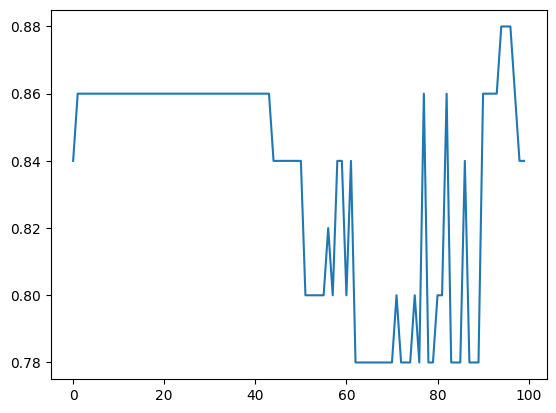

In [12]:
print(ga.optimize())
ga.view_fitness_evolution()

In [ ]:
0